# Project Structure

This homework contains four files and all these files **must remain in the same folder**:

- **main.py libs.py**: these files represent the code section of the homework, main.py contains the analysis workflow while libs.py contains all the functions used to do the exercises (both plot and score calculations)
- **report-homework-1.ipynb**: these file contains the jupyter notebook version of the report, this can be useful because I didn't show the code to plot report graphs
- **report-homework-1.pdf**: the pdf file version of the report

# Dataset

The following machine learning exercises are applied on [sklearn wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) that is taken from [UCI wine dataset](https://archive.ics.uci.edu/ml/datasets/wine). Before to go deep into the analysis it's useful for the reader to understand how wine dataset is composed, that is it might be helpful to give a look at its features, features distribution, cardinalities, kind of labels that are in the dataset and so on, since it's a crucial task in a data analysis. We can get a brief description of the dataset in the following table.

| Features | Min | Max | Mean | SD |
| :------: | :-: | :-: | :--: | :-:|
| Alcohol  | 11.0| 14.8| 13.0 | 0.8|
| Malic Acid | 0.74 | 5.80 | 2.34 | 1.12 |
| Ash | 1.36 | 3.23 | 2.36 | 0.27 |
| Alcalinity of Ash | 10.6 | 30.0 | 19.5 | 3.3 |
| Magnesium                   | 70.0 |162.0    |99.7  |14.3
| Total Phenols               |0.98  |3.88    |2.29  |0.63
| Flavanoids:                  | 0.34  |5.08   | 2.03  |1.00
| Nonflavanoid Phenols         |0.13  |0.66    |0.36  |0.12
| Proanthocyanins              |0.41  |3.58    |1.59  |0.57
| Colour Intensity              |1.3  |13.0     |5.1   |2.3
| Hue                          |0.48  |1.71    |0.96  |0.23
| OD280/OD315 of diluted wines |1.27  |4.00    |2.61  |0.71
| Proline                       |278 |  1680     |746   |315

- Missing Attribute Values: None
- Class Distribution: class_0 (59), class_1 (71), class_2 (48)

From this brief description we can see that the dataset is composed by 13 continuos features and there are 3 class lables that represent 3 different wine categories. For the following exercises we will use a 2D representation of the dataset, in particular we will use only the first two features (i.e Alchol and Malic Acid). It could be interesting to see the distribution of these features, among all classes and one per class.

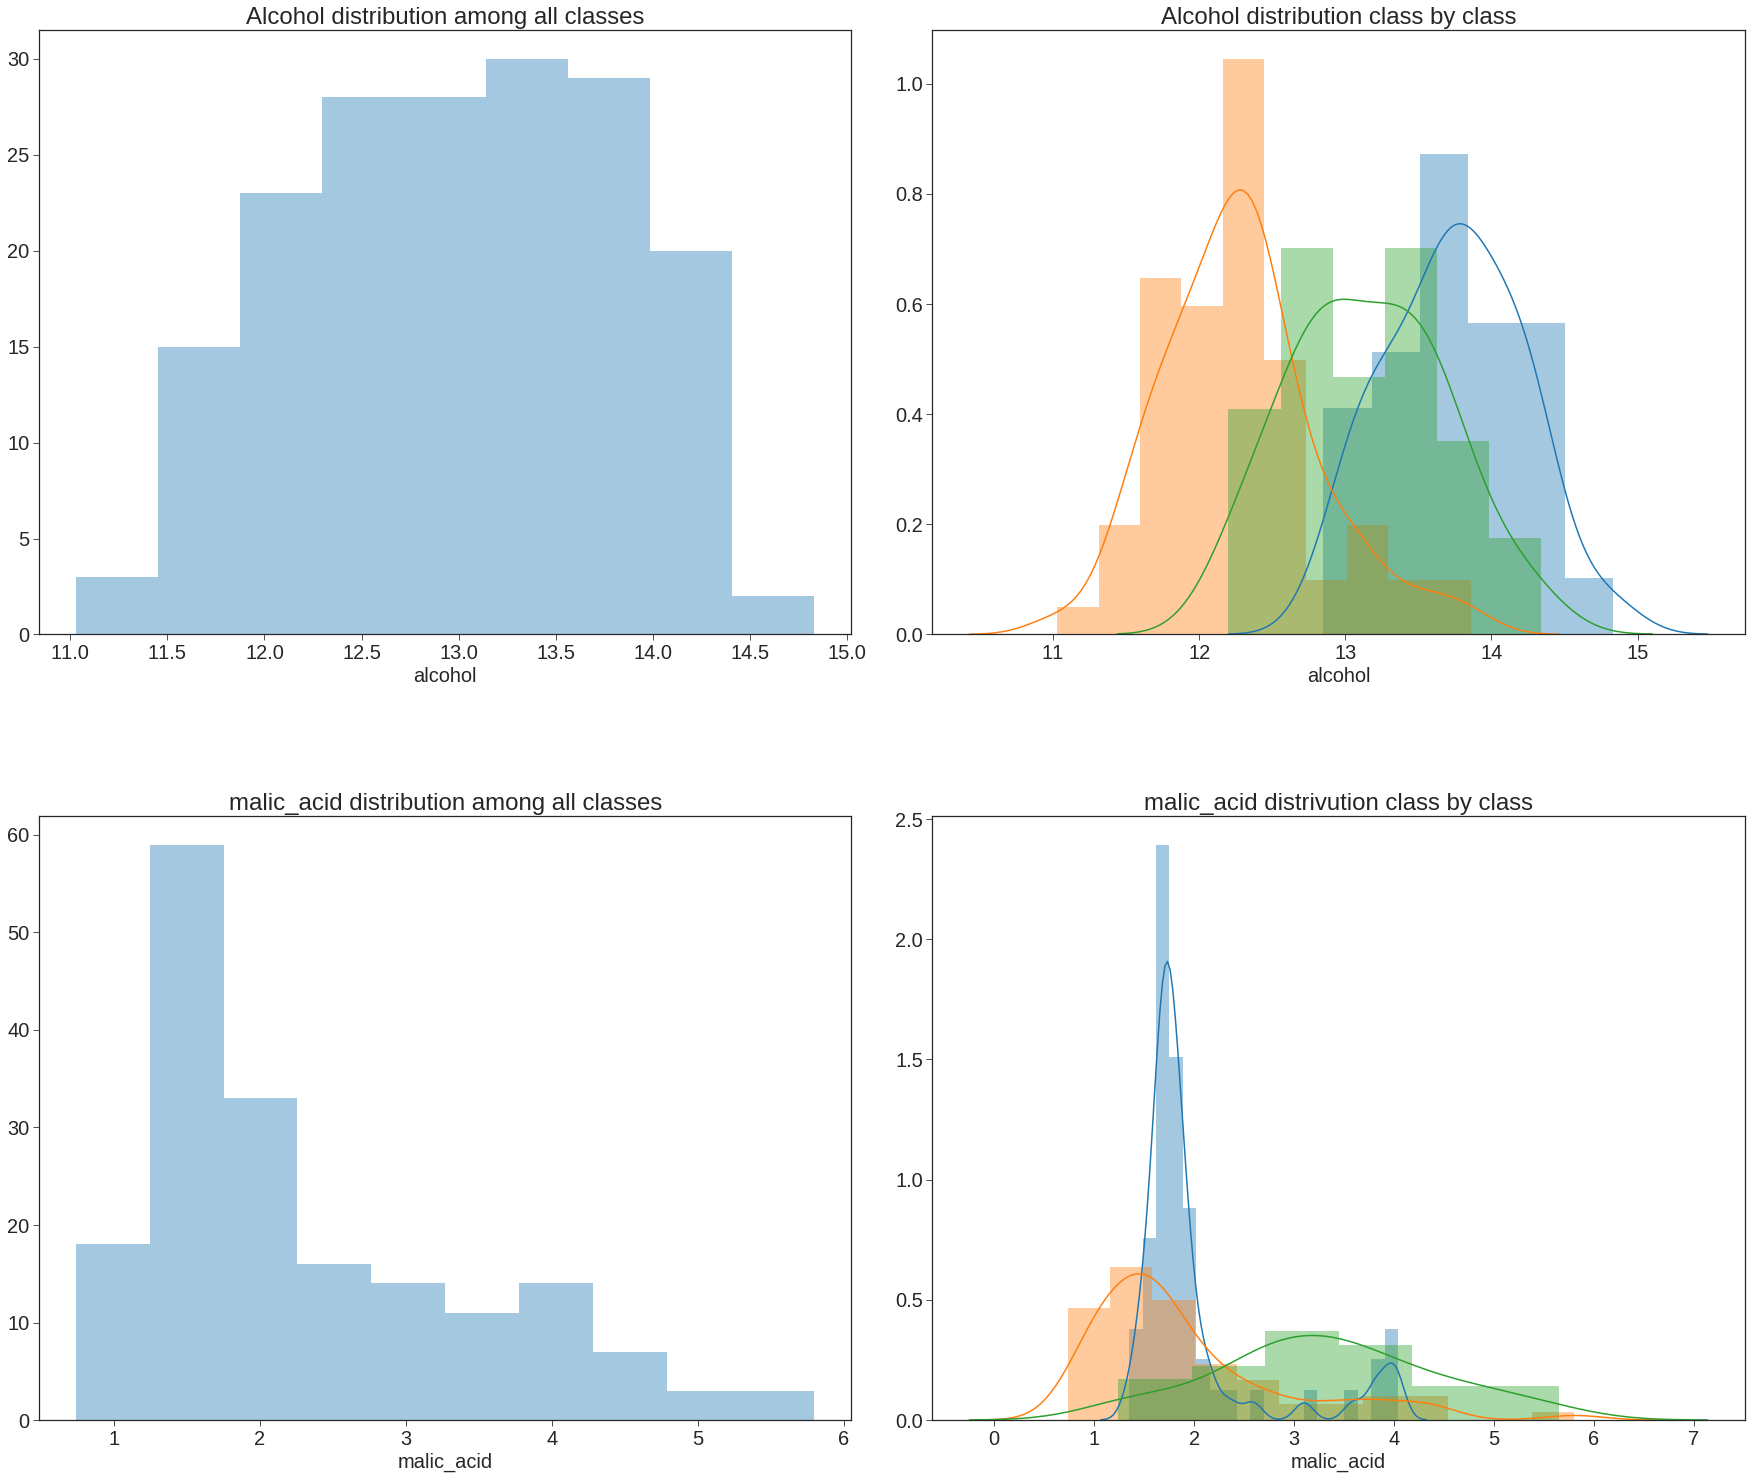

In [2]:
import sklearn as sk
from sklearn import datasets
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import libs
import numpy as np

# plot settings
plt.style.use('seaborn-ticks')
plt.rcParams['font.size'] = 20
rows = 2
columns = 2
fig, axes = plt.subplots(rows,columns,figsize=[25,25])
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top= 0.8, wspace=0.1 , hspace=0.3)

# assign a name to each ax
d = {}
i = 0
for r in range(rows):
    for c in range(columns):
        d[i] = axes[r][c]
        i += 1
raw_data = sk.datasets.load_wine()
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data['target']=raw_data['target']
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])
g0 = sns.distplot(data['alcohol'],kde=0, ax=d[0])
g0.set_title("Alcohol distribution among all classes")

for i in data.target.unique():
    g1 = sns.distplot(data['alcohol'][data.target==i], 
                 kde=1,label='{}'.format(i), ax=d[1])
    g1.set_title("Alcohol distribution class by class")

g2 = sns.distplot(data['malic_acid'],kde=0,ax=d[2])
g2.set_title("malic_acid distribution among all classes")

for i in data.target.unique():
    g3 = sns.distplot(data['malic_acid'][data.target==i], 
                 kde=1,label='{}'.format(i),ax=d[3])
    g3.set_title("malic_acid distrivution class by class")

plt.show()


From these graphs we can see an interesting distribution of *alcohol* among each class, it seems that each wine category have different percentages of alcohol inside, like a low-mid-high distribution. The other feature, *malic_acid*, give us an interesting information too, indeed it seems that the first wine category has a specific value range for these feature, even the third category seems to have a quite well separated range of value for this feature. We have to keep in mind that all these values are not scaled, scaling them could lead to more precise informations on how these wine categories are separated in terms of these features.

# Sets preparation

Before to proceed with the requested analysis I have split the data into a train, validate and test subsets as suggested. The proportion used is 5:3:2, so the 50% of the data are used as training set, 30% are used for the validation set and the remaining are used to test classifiers. To do so I have used the `train_test_split` function of the `sklearn` package. 

I've split the process into two steps, in the first step I've split data into train and test set and then I've split the train set again to get the final training set and a validation set. I doubled the split because this function can only split data in a training set and a test set as the name suggests. Using the number of samples instead of the percentage in the `test_size` option of the function I've preserved the proportion between each subsets. The seed used for random split is given by `random_state` variable that in the following analysis will be 1, so please use this value to get the same result of the report. Finally data was scaled using the [scaler class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). To do so scaler was fitted with train data and than all sets (train, validate and test) was transformed by the scaler using the `transform` function.

# K-Nearest Neighbors

To do the KNN classification I've just created an array `kn_values=[1,3,5,7]` then I used a foreach loop to iterate through this array and at each step: 

- I've saved in a variable called `kn` the current value of `k`. 
- I've created and fitted a knn model using [KneighborsCLassifier function](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict_proba). By default this classifier uses the same weight for each attribute and a `minkowski` distance metric.
- I've took the prediction score evaluated with the validation test, and if it was the current best I've store it in a variable. Here the definition of [score](https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/base.py#L332), this function returns the mean prediction accuracy of the model over a test set.
- At the end of the loop I was able to see how the best knn classifier stored in `best_clf` can perform over the test data.

In the following figures you can see knn classifiers, in every figure there are training samples represented with a colored dot, classifiers boundaries and prediction areas. The color of the dot represents the true label of that sample while the colored area represents how a dot that resides in that area will be classified. So if we have for example a blue dot inside a green area it means that a sample that is blue was classified as green.


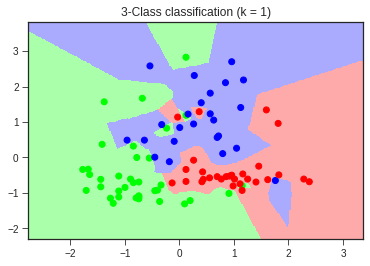

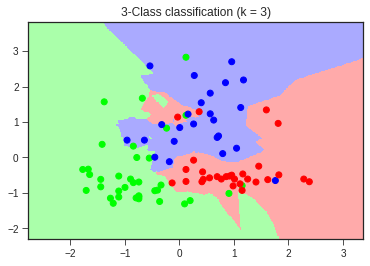

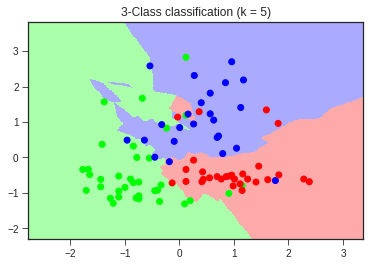

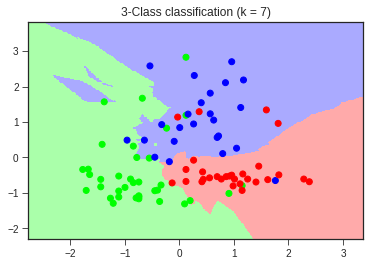

In [2]:
import libs
kn_values = [1,3,5,7]
X_train, y_train, X_validate, y_validate, X_test, y_test = libs.prepare_data()
best, scores = libs.do_knn(kn_values, X_train, y_train, X_validate, y_validate, plot=True)
print()

When K is equal to one we cannot see misclassification on training set, for other values o K instead we can see few points misclassified, so it seems that these models perform well on training data. The most important thing that we can state from these graphs is that boundaries are not linear so a non linear model will tend to overcome a linear one. Following the accuracy results of these models on validation and test sets.


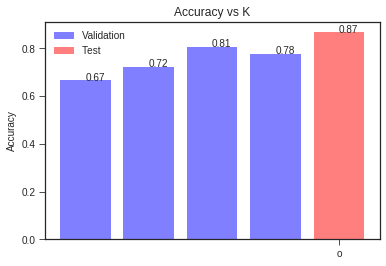

In [3]:
colorAccuracy = (0.3,0.1,0.4,0.6)
colorTest = (0.3,0.5,0.4,0.6)
objects = ('k=1', 'k=3', 'k=5', 'k=7')
p1 = libs.plot_scores(objects, scores, "Accuracy vs K" ,['blue'])
test_accuracy = {}
test_accuracy[0] = libs.get_score(best, X_test, y_test)
y_pos = [4]
p2 = plt.bar(y_pos, test_accuracy[0], align='center', alpha=0.5, color=['red'])
plt.xticks(y_pos, ('objs'))
plt.text(4, test_accuracy[0], "{0:.2f}".format(test_accuracy[0]))
plt.legend((p1[0], p2[0]), ('Validation', 'Test'))
plt.show()


# SVM Linear

In orderd to perform SVM with a linear kernel I've used a similar approach to the KNN problem, so I've 

- picked the proposed values of C and filled an array with these values
- iterate through C and at each step I've trained a SVM linear model in order to check its performance against validation set
- at the end I've used the best classifier to check its performance against the test set

the function that I used to get SVM classifier is [svm.SVC](https://scikit-learn.org/stable/modules/svm.html), in this case the value of gamma is setted to `auto` since we have not gamma. What we can actually see in this analysis is what is called a `soft margin classsifier`, with this classifier rather than seeking the largest possible margin so that every observation is not only on the correct side of the hyperplane but also on the correct side of the margin, we instead allow some observations to be on the incorrect side of the margin, or even the incorrect side of the hyperplane. (The margin is soft because it can be violated by some of the training observations.) Here some graphs that represent models and accuracy of the classifiers on the validation and test sets.

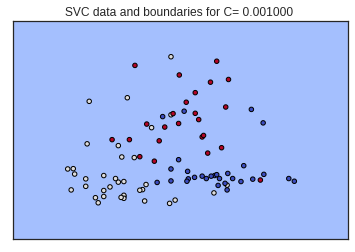

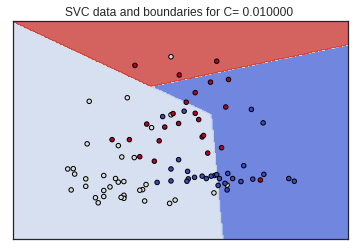

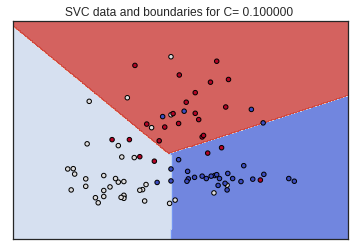

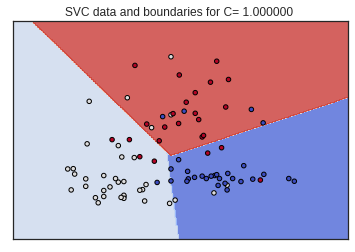

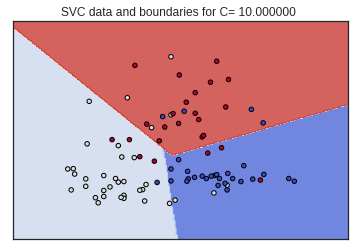

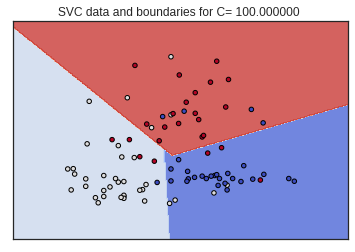

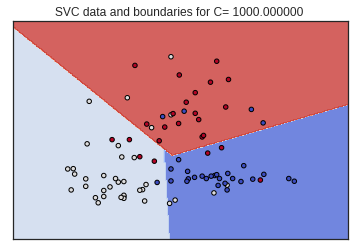

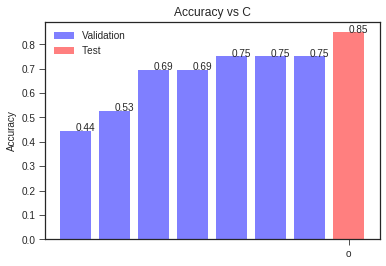

In [4]:
C=[0.001, 0.01, 0.1, 1, 10, 100,1000]
best_lin_svm, scores = libs.do_svm("linear", C, X_train, y_train, X_validate, y_validate, plot=True)
objects = ('C=0.01', 'C=0.01', 'C=0.1', 'C=1', 'C=10', 'C=100', 'C=1000')
p1 = libs.plot_scores(objects, scores, "Accuracy vs C" ,['blue'])
test_accuracy = {}
test_accuracy[0] = libs.get_score(best_lin_svm, X_test, y_test)
y_pos = [7]
p2 = plt.bar(y_pos, test_accuracy[0], align='center', alpha=0.5, color=['red'])
plt.xticks(y_pos, ('objs'))
plt.text(7, test_accuracy[0], "{0:.2f}".format(test_accuracy[0]))
plt.legend((p1[0], p2[0]), ('Validation', 'Test'))
plt.show()


When C is versy small (0.001, 0.01) the accuracy of the classifiers is very small, this is not surprising since we're trying to use a linear kernel over data that are clearly not linear separable, indeed when C=0.001 we can only have one region and all abservations are classified with that class and so the accuracy is extremly low (44%). As the budget C increases, we become more tolerant of violations to the margin, and so the margin will widen. Conversely, as C decreases, we become less tolerant of violations to the margin and so the margin narrows.

# SVM RBF

This case is essentially equals to the previous one, the only things that are changed in this analysis is the kernel that in this case will be put as `rbf` and the fact that I've introduced an array of values for `gamma` in the point 15 of the homework. Here the result of the analysis 

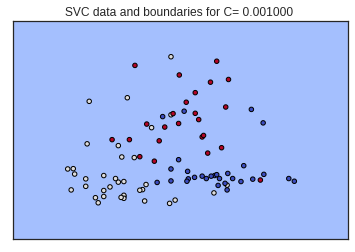

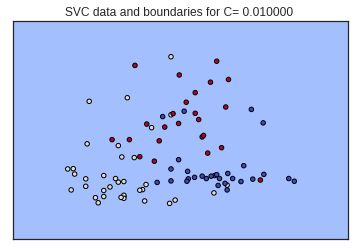

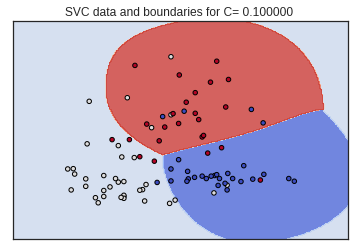

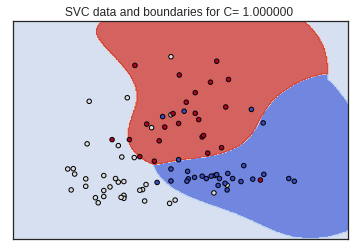

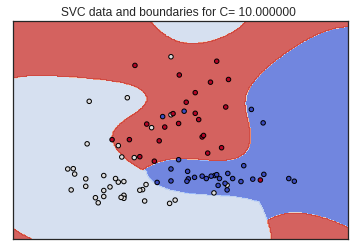

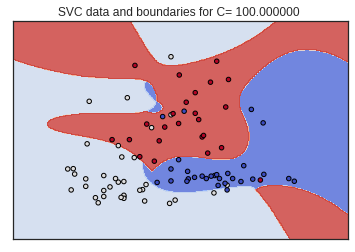

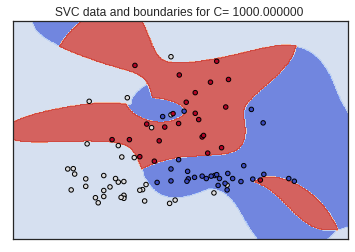

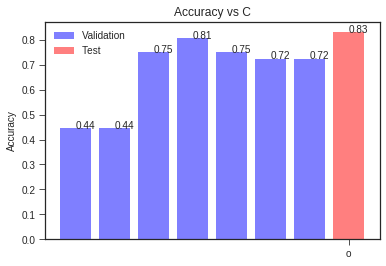

In [5]:
best_rbf_svm, scores = libs.do_svm("rbf", C, X_train, y_train, X_validate, y_validate, plot=True)
objects = ('C=0.01', 'C=0.01', 'C=0.1', 'C=1', 'C=10', 'C=100', 'C=1000')
p1 = libs.plot_scores(objects, scores, "Accuracy vs C" ,['blue'])
test_accuracy = {}
test_accuracy[0] = libs.get_score(best_rbf_svm, X_test, y_test)
y_pos = [7]
p2 = plt.bar(y_pos, test_accuracy[0], align='center', alpha=0.5, color=['red'])
plt.xticks(y_pos, ('objs'))
plt.text(7, test_accuracy[0], "{0:.2f}".format(test_accuracy[0]))
plt.legend((p1[0], p2[0]), ('Validation', 'Test'))
plt.show()

In this case the boundaries shape are different from the ones that we get with a linear kernel, in the linear settings we had linear boundaries, now boundaries are no more linear. 

# Grid search

To perform grid search I've introduced an array `gamma`. The array was filled with these values: `gamma=[1e-5, 1e-4, 1e-3, 1e-1, 10, 1000]`. As it's stated in the sklearn website

> Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning `far` and high values meaning `close`. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

So with low values of gamma we suppose that far samples are important and this lead to a more liner boundary, while with high value we focus only on near points so we can have more precise boundary. Once again choosing the right parameter for gamma is crucial in terms of variance/bias tradeoff because a more linear separator give us less variance, while a more shaped boundary fit data better, but this can cause overfitting. The grid search for tuning C and gamma was made twice:

- the first one I did it an hard coded grid search to answer to the point 15 of the homework, this is essentially a nested foreach loop, the outer iterates trough C while the nested one iterates though gamma values.
- the second one uses the sklearn function [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) that does a k-fold validation inside and this is perfect to answer to the point 17. In this case training and validate test was merged as requeusted before to proceed.

Following heatmaps to represent the two grid search and the relative score on the test set

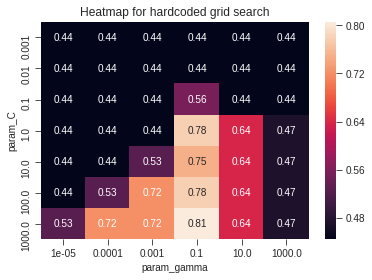

In [6]:
gamma=[1e-5, 1e-4, 1e-3, 1e-1, 10, 1000]
best_rbf_svm= libs.do_svm_grid("rbf", C, X_train, y_train, X_validate, y_validate, gamma, plot=True)
test_accuracy[0] = libs.get_score(best_rbf_svm, X_test, y_test)
print()

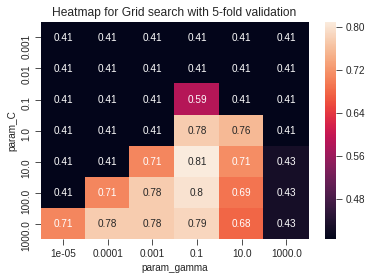

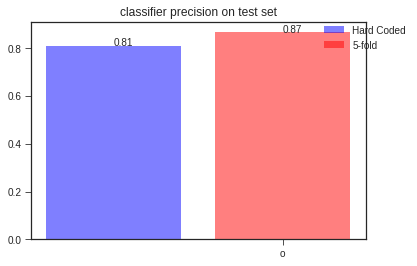

In [7]:
# plot GridSearcCV

np.concatenate((X_train, X_validate))
np.concatenate((y_train, y_validate))

best_rbf_fold=libs.get_svm_fold(X_train, y_train, plot=True)
print()

# plot scores
test_accuracy[0] = libs.get_score(best_rbf_svm, X_test, y_test)
y_pos = [0]
p1 = plt.bar(y_pos, test_accuracy[0], align='center', alpha=0.5, color=['blue'])
plt.text(0, test_accuracy[0], "{0:.2f}".format(test_accuracy[0]))
test_accuracy[0] = libs.get_score(best_rbf_fold, X_test, y_test)
y_pos = [1]
p2 = plt.bar(y_pos, test_accuracy[0], align='center', alpha=0.5, color=['red'])
plt.xticks(y_pos, ('objs'))
plt.text(1, test_accuracy[0], "{0:.2f}".format(test_accuracy[0]))
plt.legend((p1[0], p2[0]), ('Hard Coded', '5-fold'),bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.title("classifier accuracy on test set")
plt.show()

it seems that the 5-fold validation approach give us a slightly better result, possible reasons are

- before to proceed to the 5-fold validation, training set and validation set was merged, so the final model was fitted with more data
- generally k-fold validation give us better result, in the hard coded scenario I've used only one training set, this approach tends to give more importance to path founded on that particular set, k-fold instead trains more model and this approach give us a more generalized model that usually performs a little bit better on test set

# Differences between KNN and SVM

Both KNN and SVM are supervised classifiers, but they have some important differences

- KNN is a completely non-parametric approach: no assumptions are made about the shape of the decision boundary, while in SVM we have to specify a kernel
- KNN highly depends on K and all points are important to create the model, in SVM only support vectors affect the decision made by the classifier. This fact makes SVM easier to compute because in KNN we need to compute the distance between each point
- With KNN is not importan how many classes there are, this method can naturally works with hundreds of classes, SVM instead naturally fit a 2 class problem, even though there are techniques that make using SVM in a M class problem feasible (One vs One or One vs All)